In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/train - train.csv')


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
numcol=train.select_dtypes(include=['number']).columns
train.groupby('Survived')[numcol].mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,,
0,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
train.fillna({'Age':train['Age'].mean()},inplace=True)
train.fillna({'Embarked':train['Embarked'].mode()[0]},inplace=True)


In [ ]:
train.isnull().sum().sum()

np.int64(687)

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-24-c696e90ed2ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='rainbow',)


Text(0.5, 1.0, 'Survived Count')

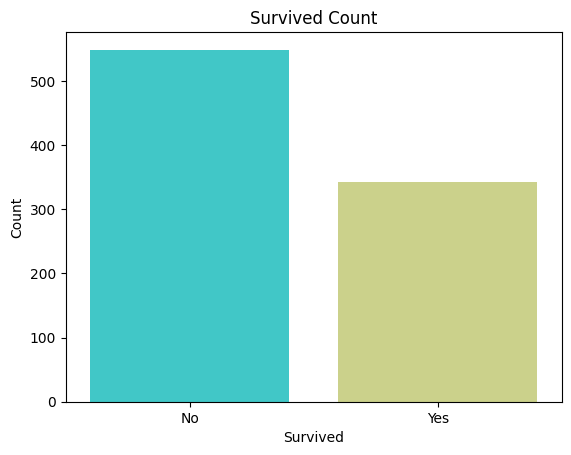

In [ ]:
sns.countplot(x='Survived',data=train,palette='rainbow',)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.title('Survived Count')

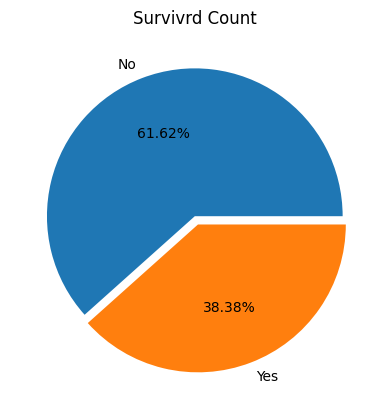

In [ ]:
plt.pie(train['Survived'].value_counts(),explode=[0,0.06],autopct='%1.2f%%',labels=['No','Yes'])
plt.title('Survivrd Count')
plt.show()

<ipython-input-28-75798caa8166>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=train,palette='rocket',)


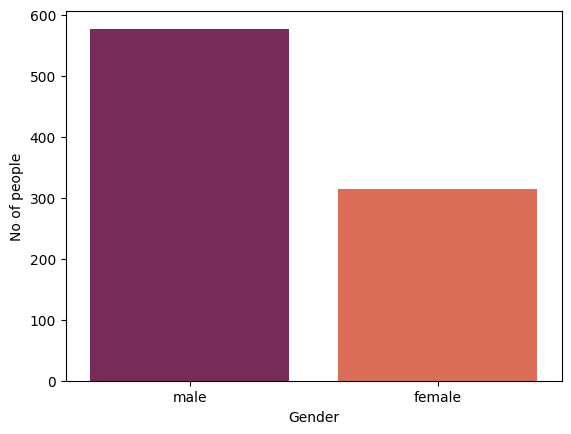

In [ ]:
sns.countplot(x='Sex',data=train,palette='rocket',)
plt.xlabel('Gender')
plt.ylabel('No of people')
plt.show()

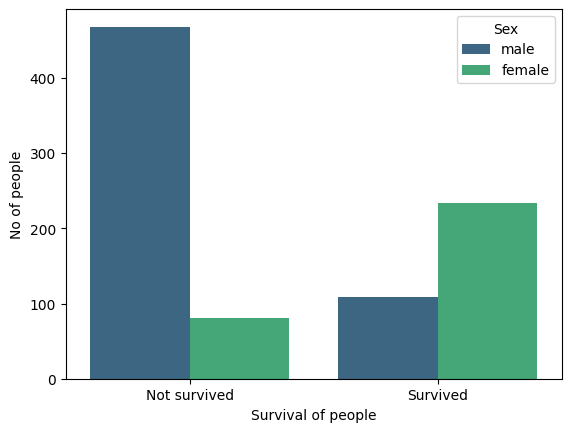

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='viridis',)
plt.xlabel('Survival of people')
plt.ylabel('No of people')
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()

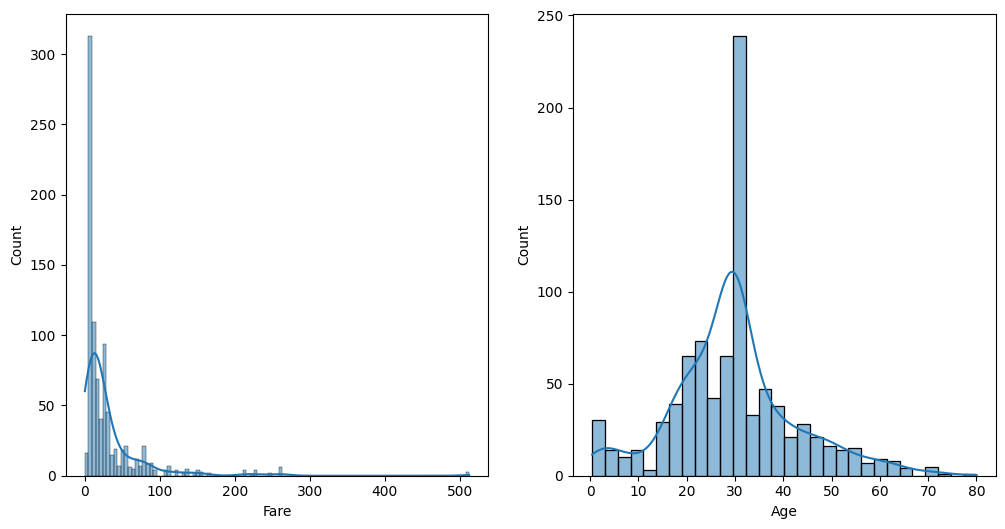

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.histplot(train['Fare'],kde=True,ax=axes[0])
sns.histplot(train['Age'].dropna(),kde=True,ax=axes[1])
plt.show()



<ipython-input-33-ecba2ed67853>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot=train.pivot_table(index='Age_category',values='Survived')


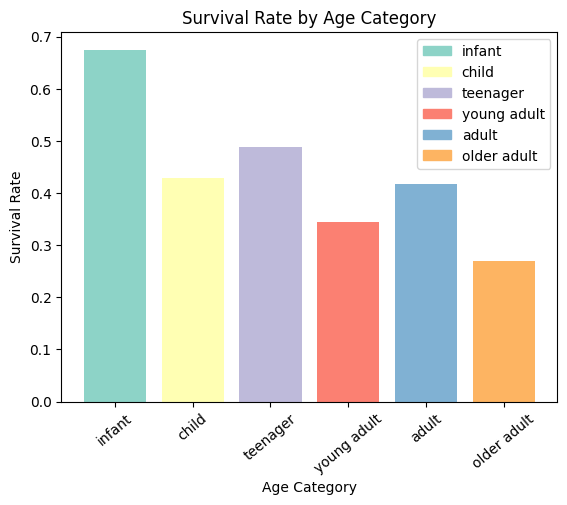

In [ ]:
cut=[0,5,12,18,35,60,100]
label_name=['infant','child','teenager','young adult','adult','older adult']
train['Age_category']=pd.cut(train['Age'],bins=cut,labels=label_name,right=False)
age_cat_pivot=train.pivot_table(index='Age_category',values='Survived')
fig,ax=plt.subplots()


num_categories = len(age_cat_pivot)
colors = plt.cm.Set3.colors[:num_categories]

bars=ax.bar(age_cat_pivot.index,age_cat_pivot['Survived'],color=colors)
handles=[plt.Rectangle((0,0),1,1,color=colors[i]) for i in range(len(colors))]
ax.legend(handles,label_name)
ax.set_title('Survival Rate by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()